## HOMEWORK 3 (SHASHANK KUMBHARE)  
  

---

### Problem 1: Check if number is even in one line function definition  
Write a one-line function is_even() that returns True is the input value to the function is an even number, and False otherwise.  

##### Solution:
```python
is_even = lambda number: True if number % 2 == 0 else False  
```

In [12]:
is_even(7)

False

In [13]:
is_even(4)

True

---

### Problem 2: Finding the maximum value of an array via recursive function calls  
Write a recursive Python function findMaxVal() that takes an input list of numbers and returns the maximum value stored the list. Do not use any max() function from any Python package. Your code should only contain if blocks and recursive function calls. Your function should return None if the input array is an empty list. 

##### Solution:
```python
def findMaxVal(my_list):
    if len(my_list) == 0:
        return None
    elif len(my_list) == 2:
        return my_list[0] if my_list[0] > my_list[1] else my_list[1]
    else:
        if my_list[0] < my_list[1]:
            del my_list[0]
            return findMaxVal(my_list)
        else:
            del my_list [1]
            return findMaxVal(my_list)
```        

In [79]:
findMaxVal([1,2,-3,4.5,2,-1])

4.5

In [53]:
findMaxVal([]) is None

True

---

### Problem 3: Finding the position of the maximum value of an array via recursive function calls  
Write a recursive Python function findMaxValMaxLoc() that takes an input list of numbers and returns, as a tuple, both the maximum value and the position (index) of maximum value in the input list. Your function should return None if the input array is an empty list.

##### Solution:
```python
def findMaxValMaxLoc(my_list):
    tuple_my_list = tuple(my_list)
    def findMaxVal(my_list):
        if len(my_list) == 0:
            return None
        elif len(my_list) == 1:
            return my_list[0]
        elif len(my_list) == 2:
            return (my_list[0]) if my_list[0] > my_list[1] else (my_list[1])
        else:
            if my_list[0] < my_list[1]:
                del my_list[0]
                return findMaxVal(my_list)
            else:
                del my_list [1]
                return findMaxVal(my_list)
    MaxLoc = tuple_my_list.index(findMaxVal(my_list)) if len(my_list) != 0 else None
    return (findMaxVal(my_list),MaxLoc) if MaxLoc != None else findMaxVal(my_list)
```

In [317]:
findMaxValMaxLoc([1,2,-3,4.5,2,-1])

(4.5, 3)

In [318]:
findMaxValMaxLoc([]) is None

True

In [319]:
findMaxValMaxLoc([1])

(1, 0)

---


### Problem 4: Monte Carlo approximation of the number Pi  
Suppose we did not know the value of π and we wanted to estimate its value using Monte Carlo methods. One practical approach is to draw a square of unit side, with its diagonal opposite corners extending from the coordinates origin (0,0) to (1,1). Now we try to simulate uniform random points from inside of this square by generating uniform random points along the X and Y axes, i.e., by generating two random uniform numbers (x,y) from the range [0,1].

Now the generated random point P has the coordinate (x,y), so we can calculate its distance from the coordinate origin. Now suppose we also draw a quarter-circle inside of this square whose radius is unit and is centered at the origin (0,0). The ratio of the area of this quarter-circle, Sc to the area of the square enclosing it, Ss is,  
  
- S<sub>c</sub>/S<sub>s</sub> = πr<sup>2</sup>/4r<sup>2</sup> = π/4  
  
This is because the area of the square of unit sides, is just 1. Therefore, if we can somehow measure the area of the quarter Sc, then we can use the following equation, to get an estimate of π,  
  
- π = 4S<sub>c</sub>  
  
In order to obtain, Sc, we are going to throw random points in the square, just as described above, and then find the fraction of points, f=n<sub>c</sub>/n<sub>total</sub>, that fall inside this quarter-circle. This fraction is related to the area of the circle and square by the following equation,  
  
- f = n<sub>c</sub>/n<sub>total</sub> = S<sub>c</sub>/S<sub>s</sub>  
  
Therefore, one can obtain an estimate of π using this fraction,  
  
- π ≈ 4n<sub>c</sub>/n<sub>total</sub>  
  
Now, write a MATLAB script, that takes in the number of points to be simulated, and then calculates an approximate value for π based on the Monte Carlo algorithm described above. Write a second function that plot the estimate of π versus the number of points simulated.

##### Solution(Part A):
```python
def find_pi(ntotal):
    import random as rd
    import math
    x = []; y = []
    [x.append(rd.random()) for i in range(ntotal)]
    [y.append(rd.random()) for i in range(ntotal)]
    dist = [math.sqrt((x[i])**2+(y[i])**2) for i in range(len(x))]
    Nc = 0
    for i in range(ntotal):
        Nc = Nc + 1 if dist[i] <= 1 else Nc
    pi_val = 4*Nc/ntotal
    return pi_val
```

In [401]:
find_pi(10000)

3.1316

Solution(Part B):
```python
def pi_plot(ntotal):
    import matplotlib.pyplot as plt
    pi_val = [find_pi(i) for i in range(1,ntotal)]
    plt.semilogx(range(1,ntotal), pi_val )
    plt.show()
```    

pi_plot(3000)

---

### Problem 5: Monte Carlo approximation of the number Pi  
In probability theory, the central limit theorem (CLT) establishes that, when independent random variables are added together, their properly normalized sum tends toward a normal distribution (informally a “bell curve”) even if the original variables themselves are not normally distributed. To understand this theorem, suppose you generate 100 uniform random numbers and sum them to get a single number. Then you repeat this procedure 1000 times to get 1000 of these sums of 100 uniform random numbers. The CLT theorem implies that if you plot a histogram of the values of these 1000 sums, then the resulting distribution looks very much like the Gaussian bell-shaped function. The larger the number of these sums (for example, 100000 instead of 1000 sums), the more the resulting distribution will look like a Gaussian. Here we want to see this theorem in action.  
  
Consider a random walker, who takes a random step of a uniformly-distributed random-size between [0,1], in positive or negative directions on a single staright line. The random walker can repeat these steps for nstep times, starting from an arbitrary initial starting point.  
  

#### Part A  
Write a function with the interface doRandomWalk(nstep,startPosition), that takes the number of steps nstep for a random walk and the startPosition of the random walk on a straight line, and returns the location of the final step of the random walker.

##### Solution(Part A):
```python
def doRandomWalk(nstep,startPosition):
    import random
    final_location = startPosition
    for i in range(nstep):
        final_location = final_location + random.choice([-1,1])*random.uniform(0,1)
    return final_location
```

#### Part B  
Now, write another function with the interface simulateRandomWalk(nsim,nstep,startPosition) that simulates nsim number of random-walks, each of which contains nstep steps and starts at startPosition. Then, this function calls doRandomWalk() repeatedly for nsim times and finally returns a vector of size nsim containing final locations of all of the nsim simulated random-walks.  

##### Solution(Part B):
```python
def simulateRandomWalk(nsim,nstep,startPosition):
    final_location = []
    for i in range(nsim):
        final_location.append(doRandomWalk(nstep,startPosition))
    return final_location
```

In [397]:
simulateRandomWalk(20,20,0)

[0.26704653154500735,
 -3.0098524012810213,
 3.661892484986801,
 2.9037563616389828,
 -5.055119745772716,
 -1.5693026780637802,
 -2.1094232172854235,
 1.8986755654606056,
 0.9259120145644256,
 4.376220003136917,
 -4.989303816724532,
 -3.7263362083187284,
 -0.24004023373363914,
 3.8197447838251386,
 0.36929127920519544,
 4.855839965362425,
 -3.4017348426550678,
 -1.58942634964738,
 2.4395380586934694,
 -1.3187689188683414]

#### Part C  
Now write a script that plots the output of simulateRandomWalk() for
- nsim = 10000  
- nstep = 10  
- startPosition = -10  

##### Solution(Part C):
```python
import matplotlib.pyplot as plt
plt.hist(simulateRandomWalk(10000,10,-10))
#plt.hist(c, bins = 100)
plt.show()
```

In [ ]:
Notes

In [163]:
import random
b=[[(random.uniform(0,1)) for i in range(100)] for j in range(100000)]

In [164]:
c = [sum(b[i]) for i in range(100000)]
len(c)

100000

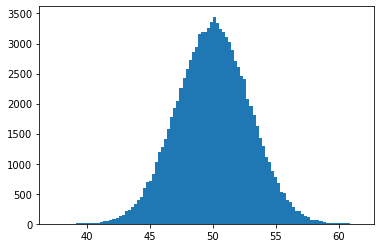

In [402]:
import matplotlib.pyplot as plt
plt.hist(c, bins = 100)
plt.show()

In [286]:
import numpy as np
random.choice([-1,1])

1